<a href="https://colab.research.google.com/github/Shafiq-Abdu/Tutorial/blob/main/Linear_Regression_in_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas scikit-learn matplotlib

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [ ]:


# Define the stock symbol (Nifty 50 index)

# Calculate the end date (last day of the previous week)
# today = datetime.today()
# end_date = today - timedelta(days=today.weekday() + 2)  # Assuming today is Monday, this gives Friday of the previous week

# # Calculate the start date (5 days before the end date)
# start_date = end_date - timedelta(days=)

# # Fetch historical stock price data
# stock = yf.Ticker(stock_symbol)
# data = stock.history(start=start_date, end=end_date)

# # Print the fetched data
# print(data)


In [ ]:
start_date = "2024-05-01"
end_date = "2024-06-15"
stock_symbol = "^NSEI"
data = yf.download(stock_symbol, start=start_date, end=end_date)
data.dropna(inplace=True)
print(data)

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2024-05-02  22567.849609  22710.500000  22567.849609  22648.199219   
2024-05-03  22766.349609  22794.699219  22348.050781  22475.849609   
2024-05-06  22561.599609  22588.800781  22409.449219  22442.699219   
2024-05-07  22489.750000  22499.050781  22232.050781  22302.500000   
2024-05-08  22231.199219  22368.650391  22185.199219  22302.500000   
2024-05-09  22224.800781  22307.750000  21932.400391  21957.500000   
2024-05-10  21990.949219  22131.300781  21950.300781  22055.199219   
2024-05-13  22027.949219  22131.650391  21821.050781  22104.050781   
2024-05-14  22112.900391  22270.050781  22081.250000  22217.849609   
2024-05-15  22255.599609  22297.550781  22151.750000  22200.550781   
2024-05-16  22319.199219  22432.250000  22054.550781  22403.849609   
2024-05-17  22415.250000  22502.150391  22345.650391  22466.099609   
2024-05-21  22404.55

In [ ]:
df = pd.DataFrame(data['Close'])
                                         # Add a column for the day number (1, 2, 3, ...)
df['Day'] = range(1, len(df) + 1)
                                                   # Prepare the data for modeling
X = df[['Day']]
y = df['Close']

In [ ]:
X,y

(            Day
 Date           
 2024-05-02    1
 2024-05-03    2
 2024-05-06    3
 2024-05-07    4
 2024-05-08    5
 2024-05-09    6
 2024-05-10    7
 2024-05-13    8
 2024-05-14    9
 2024-05-15   10
 2024-05-16   11
 2024-05-17   12
 2024-05-21   13
 2024-05-22   14
 2024-05-23   15
 2024-05-24   16
 2024-05-27   17
 2024-05-28   18
 2024-05-29   19
 2024-05-30   20
 2024-05-31   21
 2024-06-03   22
 2024-06-04   23
 2024-06-05   24
 2024-06-06   25
 2024-06-07   26
 2024-06-10   27
 2024-06-11   28
 2024-06-12   29
 2024-06-13   30
 2024-06-14   31,
 Date
 2024-05-02    22648.199219
 2024-05-03    22475.849609
 2024-05-06    22442.699219
 2024-05-07    22302.500000
 2024-05-08    22302.500000
 2024-05-09    21957.500000
 2024-05-10    22055.199219
 2024-05-13    22104.050781
 2024-05-14    22217.849609
 2024-05-15    22200.550781
 2024-05-16    22403.849609
 2024-05-17    22466.099609
 2024-05-21    22529.050781
 2024-05-22    22597.800781
 2024-05-23    22967.650391
 2024-05-24 

In [ ]:
len(df)

31

Fit a linear regression model

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
a = model.coef_
b = model.intercept_
a,b

(array([35.8447998]), 22096.31857358871)

Predict without train and test data

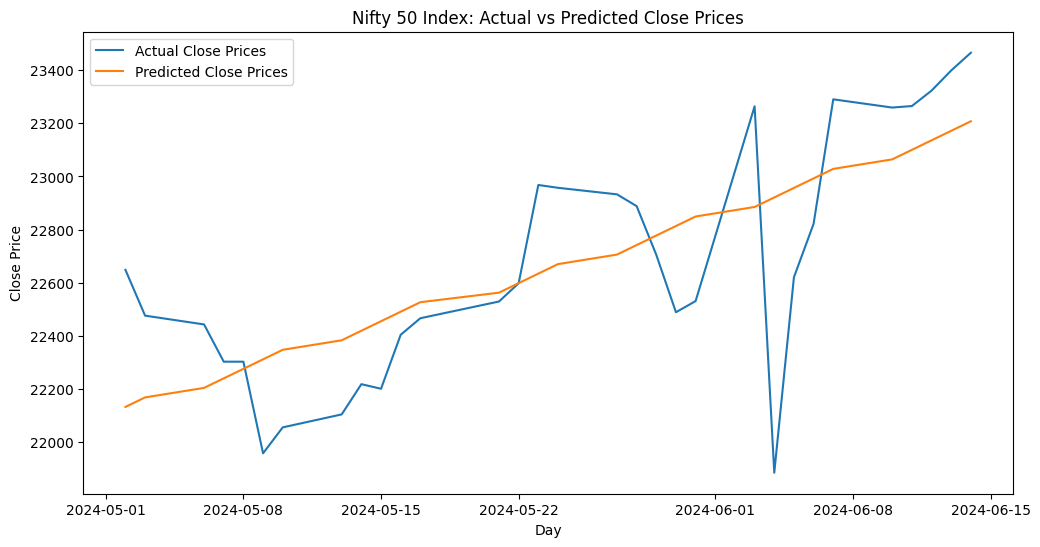

Coefficient: 35.84
Intercept: 22096.32


In [ ]:

# Predict the stock prices using the linear model
df['Predicted'] = model.predict(X)

# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Close Prices')
plt.plot(df['Predicted'], label='Predicted Close Prices')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Nifty 50 Index: Actual vs Predicted Close Prices')
plt.legend()
plt.show()

# Print the coefficients and intercept
print(f"Coefficient: {a[0]:.2f}")
print(f"Intercept: {b:.2f}")

To predict the future value, we have to count the day number

In [ ]:
                              # Define the date for prediction
prediction_date = "2024-06-18"

# Calculate the day number for the prediction date relative to the start date
days_since_start = (pd.to_datetime(prediction_date) - pd.to_datetime(start_date)).days + 1  # Adding 1 to start from day 1

# Use the linear regression model to predict the closing value for the prediction date
predicted_closing_value = model.predict([[days_since_start]])

# Print the predicted closing value
print(f"Predicted closing value for {prediction_date}: {predicted_closing_value[0]:.2f}")


Predicted closing value for 2024-06-18: 23852.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Now, we'll train and test the data, whhich is not easy in financial markets

In [ ]:
# Split the data into training 80% and testing sets 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
X_train

,Day
Date,
2024-05-17,12
2024-05-28,18
2024-06-05,24
2024-05-09,6
2024-05-27,17
2024-05-14,9
2024-05-23,15
2024-06-06,25
2024-05-31,21


from matplotlib import pyplot as plt
X_train['Day'].plot(kind='hist', bins=20, title='Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['Day'].plot(kind='line', figsize=(8, 4), title='Day')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
coefficients = model.coef_
intercept = model.intercept_
coefficients[0],intercept

(37.18116575043233, 22085.82273535287)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Mean Squared Error on Test Set: 185608.93


In [ ]:
y_test,y_pred,model.predict(X),y

(Date
 2024-05-06    22442.699219
 2024-06-13    23398.900391
 2024-05-22    22597.800781
 2024-05-16    22403.849609
 2024-06-11    23264.849609
 2024-06-07    23290.150391
 2024-06-04    21884.500000
 Name: Close, dtype: float64,
 array([22197.3662326 , 23201.25770787, 22606.35905586, 22494.81555861,
        23126.89537636, 23052.53304486, 22940.98954761]),
 array([22123.0039011 , 22160.18506685, 22197.3662326 , 22234.54739835,
        22271.72856411, 22308.90972986, 22346.09089561, 22383.27206136,
        22420.45322711, 22457.63439286, 22494.81555861, 22531.99672436,
        22569.17789011, 22606.35905586, 22643.54022161, 22680.72138736,
        22717.90255311, 22755.08371886, 22792.26488461, 22829.44605036,
        22866.62721611, 22903.80838186, 22940.98954761, 22978.17071336,
        23015.35187911, 23052.53304486, 23089.71421061, 23126.89537636,
        23164.07654212, 23201.25770787, 23238.43887362]),
 Date
 2024-05-02    22648.199219
 2024-05-03    22475.849609
 2024-05-06   

In [ ]:
df['Predicted'] = model.predict(X)


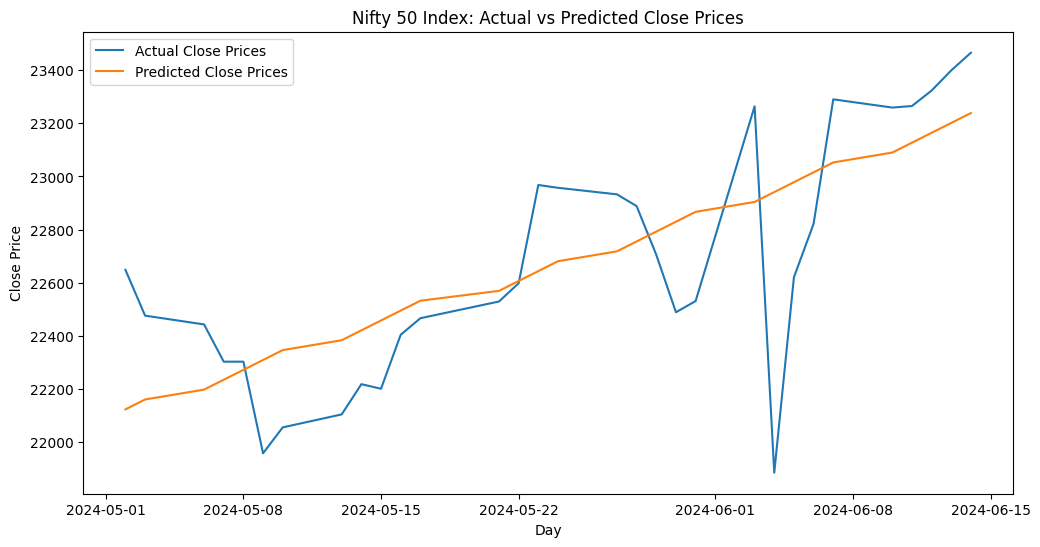

In [ ]:
# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Close Prices')
plt.plot(df['Predicted'], label='Predicted Close Prices')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Nifty 50 Index: Actual vs Predicted Close Prices')
plt.legend()
plt.show()
